In [141]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress,t
from scipy import stats
import math

def plot_data_theory(datafile, x_col, y_col, theory_col='', title='', x_label='', y_label='', x_unit='', y_unit='', x_error=0.0, y_error=0.0, theory_error=0.0, no_reg = False):
    df = pd.read_excel('data/'+datafile+'.xlsx')

    x = df[x_col]
    y = df[y_col]
    if theory_col != '':
        theory = df[theory_col]

    if not no_reg:
        # Calculate linear regression
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        a = slope

    # Create figure and axes
    fig, ax = plt.subplots()

    # Calcul de l'incertitude sur la pente
    if not no_reg:
        delta_slope = get_delta_slope(x,y,x_error,y_error)
        ax.text(0.95, 0.05, f'a = {a:.2e} +- {delta_slope:.2e}', transform=ax.transAxes, ha='right')

    # Add data points to the plot
    ax.plot(x, y, 'o', label='Données expérimentales', ms=5, mec='cyan', mew=1)

    if theory_col != '':
        # Add theoretical data to the plot
        ax.plot(x, theory, '-', label='Théorique', lw=1, color='orange')

    if not no_reg:
        # Add linear regression to the plot
        x_reg = np.linspace(x.min(), x.max(), 100)
        y_reg = slope * x_reg + intercept
        ax.plot(x_reg, y_reg, '--', label=f'Régression linéaire: f(x)=ax+b', lw=1, color='cyan')

    # Add axis labels and title
    ax.set_xlabel(x_label + ' (' + x_unit + ')')
    ax.set_ylabel(y_label + ' (' + y_unit + ')')
    ax.set_title(title)

    # Add legend
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

    # Add error bars
    if x_error > 0:
        ax.errorbar(x, y, xerr=x_error, fmt='none', capsize=3, ecolor='cyan')
    if y_error > 0:
        ax.errorbar(x, y, yerr=y_error, fmt='none', capsize=3, ecolor='cyan')
    if (theory_error > 0 and theory_col != ''):
        ax.errorbar(x, theory, yerr=theory_error, fmt='none', capsize=2, ecolor='orange')

    # Add power of 10 scale to axes
    ax.yaxis.set_major_formatter('{x:.1e}')
    ax.xaxis.set_major_formatter('{x:.1e}')

    if not no_reg:
        # Add R^2 value to the plot
        ax.text(0.05, 0.95, f'$R^2 = {r_value**2:.2f}$', transform=ax.transAxes, fontsize=12, verticalalignment='top')

    plt.show()

def get_delta_slope(x,y,x_err,y_err):
    n = np.size(x)-1
    x1max = x[0] + x_err
    y1max = y[0] - y_err
    x2max = x[n] - x_err
    y2max = y[n] + y_err

    slopemax = (y2max-y1max)/(x2max-x1max)

    x1min = x[0] - x_err
    y1min = y[0] + y_err
    x2min = x[n] + x_err
    y2min = y[n] - y_err

    slopemin = (y2min-y1min)/(x2min-x1min)

    return abs(slopemax-slopemin)

def get_resistivity_from_length(slope, delta, diameter):
    #Permet d'obtenir la resistivité
    return slope *math.pi*(diameter**2)/4,delta*math.pi*(diameter**2)/4

def get_resistivity_from_diameter(slope, delta, length):
    #Permet d'obtenir la resistivité
    a = math.pi / (length * 4)
    return slope * a, delta * a

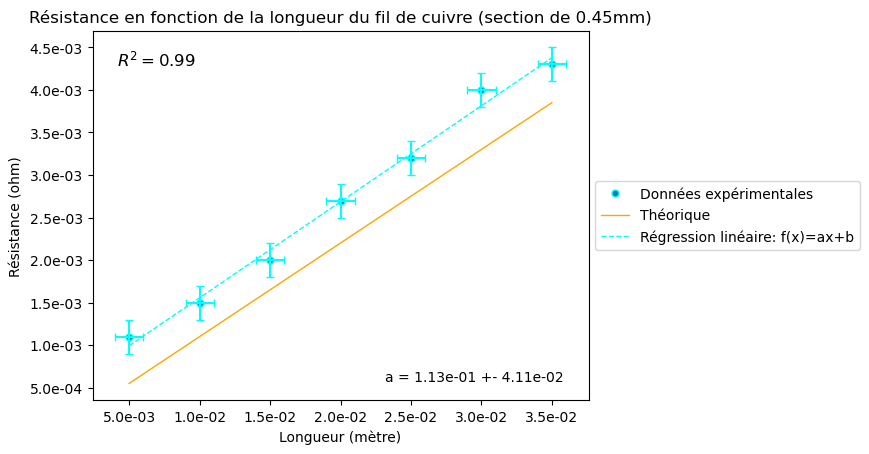

(1.797187347394211e-08, 6.536672564416112e-09)


In [142]:
# appel de la fonction pour tracer le graphique pour 0.45 mm de section de cuivre
plot_data_theory('data045', 'Longueur', 'Resistance', 'Theorique',
                  title='Résistance en fonction de la longueur du fil de cuivre (section de 0.45mm)',
                  x_label='Longueur', y_label='Résistance',x_unit='mètre',y_unit='ohm',x_error=0.001,y_error=0.0002)
print(get_resistivity_from_length(0.113,0.0411,.00045))

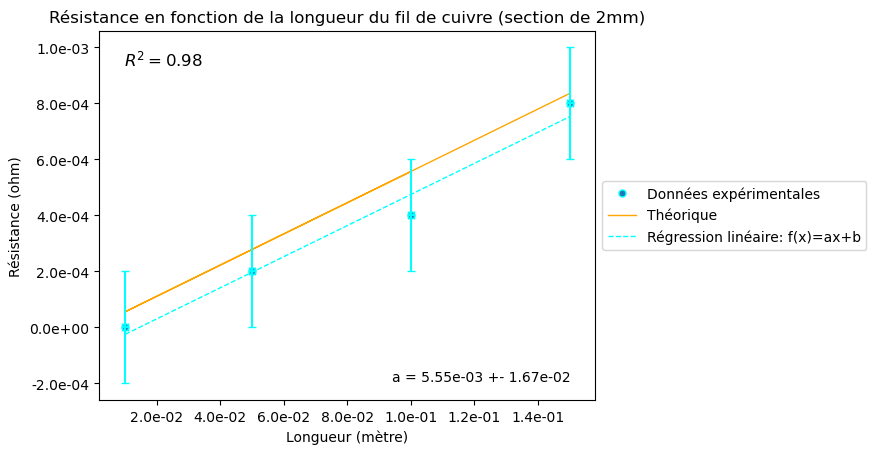

(1.7435839227423353e-08, 5.2464597314949535e-08)


In [145]:
# appel de la fonction pour tracer le graphique pour 2 mm de section de cuivre
plot_data_theory('data2', 'Longueur', 'Resistance', 'Theorique',
                  title='Résistance en fonction de la longueur du fil de cuivre (section de 2mm)',
                  x_label='Longueur', y_label='Résistance',x_unit='mètre',y_unit='ohm',x_error=0.001,y_error=0.0002)
print(get_resistivity_from_length(0.00555,0.0167,0.002))

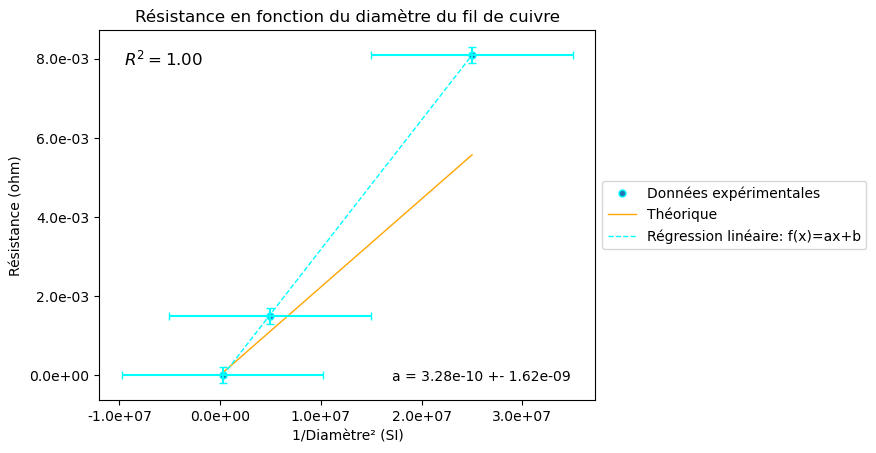

(2.57610597594363e-07, 1.272345024703866e-06)


In [147]:
# appel de la fonction pour tracer le graphique pour le diamètre
plot_data_theory('data_diam', 'Diametre^-2', 'Resistance', 'Theorique',
                  title='Résistance en fonction du diamètre du fil de cuivre',
                  x_label='1/Diamètre²', y_label='Résistance',x_unit='SI',y_unit='ohm',x_error=10000000,y_error=0.0002)
print(get_resistivity_from_diameter(0.000000000328,0.00000000162,0.001))

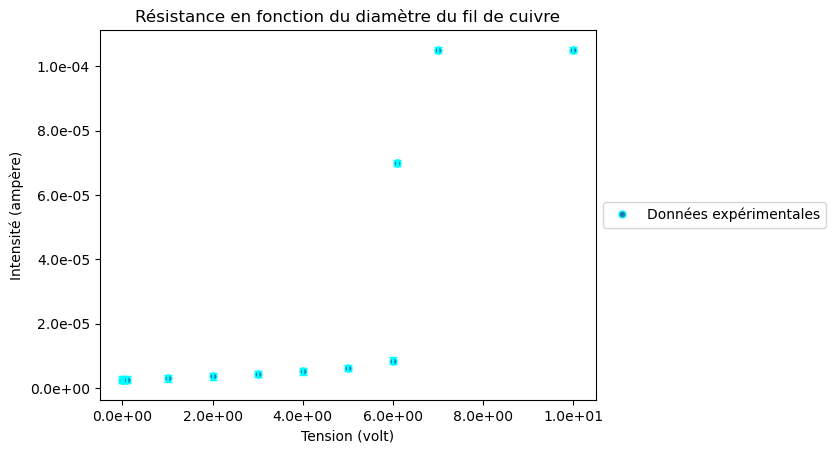

In [149]:
# appel de la fonction pour tracer le graphique pour intensité en fonction de la tension pour le premier semi
plot_data_theory('data_semi', 'Tension', 'Intensité',
                  title='Résistance en fonction du diamètre du fil de cuivre',
                  x_label='Tension', y_label='Intensité',x_unit='volt',y_unit='ampère',x_error=0.0005,y_error=0.000001,no_reg = True)